In [4]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Twitter Api Credentials
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [11]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="@JoeBiden",
                          count = 3, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Donald Trump does not decide the outcome of this election and nor do I. The American people decide. That’s why we’ve launched the Biden Fight Fund — to ensure every vote is counted.

Chip in to help fund our election protection efforts across the country: https://t.co/ps6VhGy0m5

2) I’m confident that we will emerge victorious.

But this will not be my victory alone.

It will be a victory for the American people. https://t.co/ZqJBVsQuQf

3) It’s clear that when the count is finished, we believe we will be the winners. https://t.co/qVk0igZlrF



In [13]:

# Extract 100 tweets from the twitter user
posts_Trump = api.user_timeline(screen_name="@realDonaldTrump",
                          count = 3, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet_Trump in posts_Trump[:5]:
    print(str(i) +') '+ tweet_Trump.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Detroit Absentee Ballot Counting Chaos, Blocked Windows and Observers https://t.co/KzIwhbQrDt via @BreitbartNews



In [17]:
### DF Biden
# Create a dataframe with a column called Tweets
df_Biden = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df_Biden.head()


,Tweets
0,Donald Trump does not decide the outcome of th...
1,I’m confident that we will emerge victorious.\...
2,"It’s clear that when the count is finished, we..."


In [18]:

### DF Trump
# Create a dataframe with a column called Tweets
df_Trump = pd.DataFrame([tweet.full_text for tweet in posts_Trump], columns=['Tweets'])
# Show the first 5 rows of data
df_Trump.head()

,Tweets
0,"Detroit Absentee Ballot Counting Chaos, Blocke..."


## Cleaning Data with Regex
### Create a function to clean the tweets


In [19]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


### Clean the tweets
df_Biden['Tweets'] = df_Biden['Tweets'].apply(cleanTxt)
df_Trump['Tweets'] = df_Trump['Tweets'].apply(cleanTxt)

In [21]:
### Show the cleaned tweets
df_Biden


,Tweets
0,Donald Trump does not decide the outcome of th...
1,I’m confident that we will emerge victorious.\...
2,"It’s clear that when the count is finished, we..."


In [22]:
df_Trump

,Tweets
0,"Detroit Absentee Ballot Counting Chaos, Blocke..."


## Create a function to get the subjectivity

In [25]:

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

##  Create a function to get the polarity

In [26]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

## Create two new columns 'Subjectivity' & 'Polarity'


In [27]:
# Biden
df_Biden['Subjectivity'] = df_Biden['Tweets'].apply(getSubjectivity)
df_Biden['Polarity'] = df_Biden['Tweets'].apply(getPolarity)

# Trump
df_Trump['Subjectivity'] = df_Trump['Tweets'].apply(getSubjectivity)
df_Trump['Polarity'] = df_Trump['Tweets'].apply(getPolarity)


In [28]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_Biden

,Tweets,Subjectivity,Polarity
0,Donald Trump does not decide the outcome of th...,0.000000,0.00
1,I’m confident that we will emerge victorious.\...,0.416667,0.25
2,"It’s clear that when the count is finished, we...",0.383333,0.10


In [29]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_Trump

,Tweets,Subjectivity,Polarity
0,"Detroit Absentee Ballot Counting Chaos, Blocke...",0.0,0.0


## word cloud visualization (may this not be needed to us)

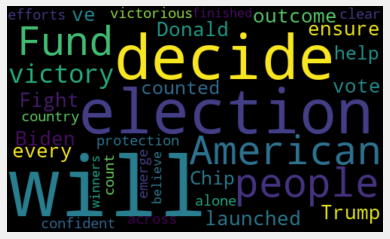

In [30]:
allWords = ' '.join([twts for twts in df_Biden['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

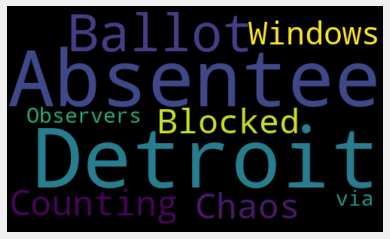

In [32]:
allWords_Trump = ' '.join([twts for twts in df_Trump['Tweets']])
wordCloud_Trump = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords_Trump)


plt.imshow(wordCloud_Trump, interpolation="bilinear")
plt.axis('off')
plt.show()

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis


In [34]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'


In [35]:
df_Biden['Analysis'] = df_Biden['Polarity'].apply(getAnalysis)
# Show the dataframe
df_Biden

,Tweets,Subjectivity,Polarity,Analysis
0,Donald Trump does not decide the outcome of th...,0.000000,0.00,Neutral
1,I’m confident that we will emerge victorious.\...,0.416667,0.25,Positive
2,"It’s clear that when the count is finished, we...",0.383333,0.10,Positive


In [36]:
df_Trump['Analysis'] = df_Trump['Polarity'].apply(getAnalysis)
# Show the dataframe
df_Trump

,Tweets,Subjectivity,Polarity,Analysis
0,"Detroit Absentee Ballot Counting Chaos, Blocke...",0.0,0.0,Neutral


In [37]:
### There is already the column with this flag so maybe we don't need it
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df_Biden.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing positive tweets:

1) I’m confident that we will emerge victorious.

But this will not be my victory alone.

It will be a victory for the American people. 

2) It’s clear that when the count is finished, we believe we will be the winners. 



# Plotting 

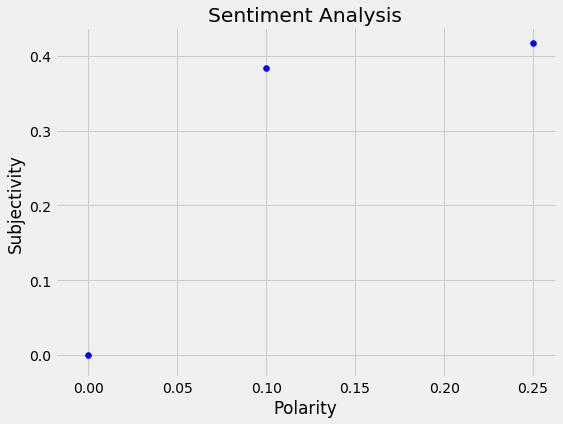

In [40]:
plt.figure(figsize=(8,6)) 
for i in range(0, df_Biden.shape[0]):
  plt.scatter(df_Biden["Polarity"][i], df_Biden["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

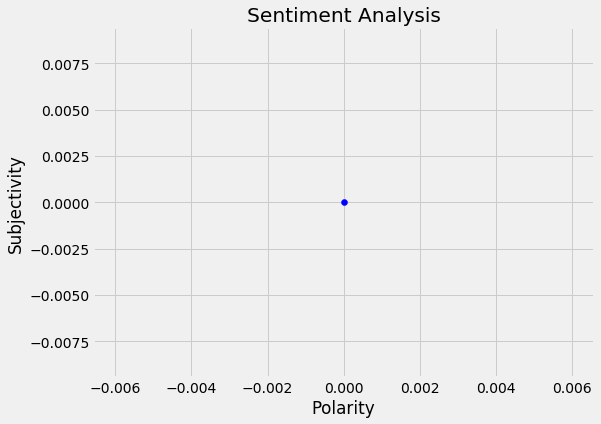

In [41]:
plt.figure(figsize=(8,6)) 
for i in range(0, df_Trump.shape[0]):
  plt.scatter(df_Trump["Polarity"][i], df_Trump["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Print the percentage of positive tweets


In [42]:
ptweets = df_Biden[df_Biden.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df_Biden.shape[0]) * 100 , 1)

66.7

# Print the percentage of positive tweets

In [44]:
ntweets = df_Biden[df_Biden.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df_Biden.shape[0]) * 100, 1)

0.0

# Show the value counts

In [47]:
df_Biden['Analysis'].value_counts()

Positive    2
Neutral     1
Name: Analysis, dtype: int64

In [48]:
df_Trump['Analysis'].value_counts()

Neutral    1
Name: Analysis, dtype: int64

# Plotting and visualizing the counts

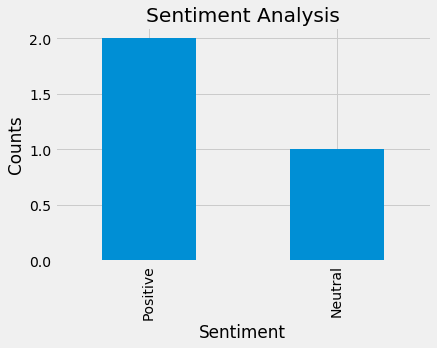

In [49]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_Biden['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

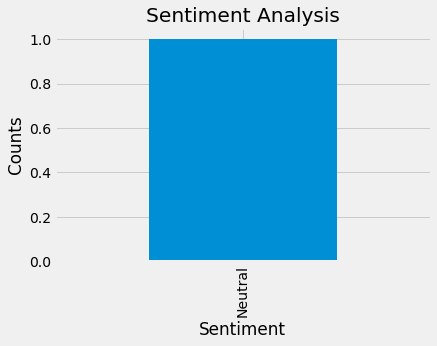

In [50]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_Trump['Analysis'].value_counts().plot(kind = 'bar')
plt.show()